# Regresión Lineal
La regresión lineal es la aplicación de un modelo lineal entre una variable dependiente ($y$) y una o más variables dependientes ($X$).

$$\hat{y}=x_0w_0+x_1w_1+...+x_iw_i+b$$

donde, considerando un error $\varepsilon$: 

$$y = \hat{y}+\varepsilon$$ 

Siendo el caso de una variable:

$$\hat{y}=xw+b$$

A continuación se presenta un ejemplo basado en datos generados. Para este ejemplo se generarán 50 puntos con la siguiente distribución:

$$y=3*x+(rand-0.5)$$

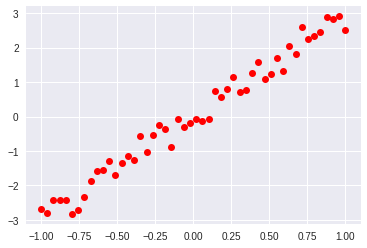

x: [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]
y: [-2.68423381 -2.7945996  -2.42340052 -2.41159883 -2.4252224  -2.82992206
 -2.7111685  -2.3354195  -1.88729048 -1.57730557 -1.56680506 -1.29640322
 -1.70346205 -1.34347927 -1.16157978 -1.26906125 -0.57128257 -1.03424527
 -0.54063462 -0.23831039 -0.35394526 -0.8947397  -0.05966057 -0.31516733
 -0.18362225 -0.06936058 -0.13911527 -0.07818283  0.73052265  0.55337362
  0.80803006  1.141

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def gen_random_data(mult):
    _x = np.linspace(-1, 1, 50)
    _error = (np.random.rand(*_x.shape) - .5)
    _y = _x * mult + _error
    return _x, _y


x, y = gen_random_data(3)
plt.plot(x, y, 'ro')
plt.show()
print('x: {}'.format(x))
print('y: {}'.format(y))

## Objetivo
Considerando la varaible independiente $x$ y la variable dependiente $y$, el objetivo de un regresión lineal es encontrar $w$ y $b$ tal que dada una función de error $E(y, \hat{y})$ sea mínimo. Es decir:

$$\underset{w,b}{arg\,min}=E(y,xw+b)$$

### Ejercicio
Complete la definición de la función `lineal` presentada a continuación, y grafique la función sobre los datos generados.

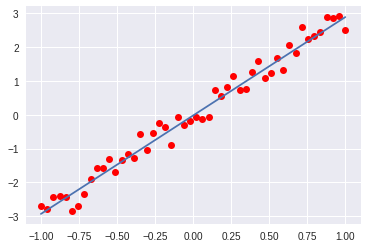

In [3]:
def lineal(x, w, b):
    return x * w + b# su respuesta aquí


plt.plot(x, y, 'ro', x, lineal(x, 2.909175121868497, -0.02141324800059463))
plt.show()

## Función de error
Una función de error utilizada para este tipo de problemas es el error medio cadrático (_mean squared error_), que se define como:

$$MSE(y,\hat{y})=\frac{1}{N}\sum(y-\hat{y})$$

In [41]:
def mse(y_true, y_pred):
    return np.average((y_true-y_pred)**2)

print('El MSE es {}'.format(mse(y, lineal(x, 2.9270604571828085, -0.013141134404810462))))

El MSE es 0.06997340097908164


## Optimización
El problema en la regresión lineal es encontrar los parámetro que minimiza el valor de la función de error. A continuación se presenta un gráfico mostrando el valor de la función de $mse$ para diverso valores de $w$ y $b$.

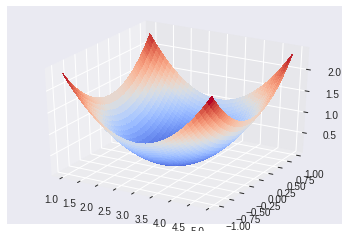

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Construyendo datos
w = np.arange(1, 5, 0.1)
b = np.arange(-1, 1, 0.01)
w, b = np.meshgrid(w, b)
e = np.empty_like(w)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        e[i, j] = mse(y, lineal(x, w[i, j], b[i, j]))


# Plot the surface.
surf = ax.plot_surface(w, b, e, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


plt.show()

Obviamente, calculando el error para diversos valores de $w$ y $b$ se puede seleccionar el mínimo. Sin embargo, esto es impracticable cuando existen muchos parámetros o puntos de datos.
Por simplicadas, a continuación vamos a suponer que se conoce $b=0$ resultando en que $\hat{y}=xw$, por simplicidad la llamaremos $h(x)$. Entonces, nuestro único problema sería encontrar $w$. En este caso, si graficamos la curva de error obtendríamos lo siguiente.

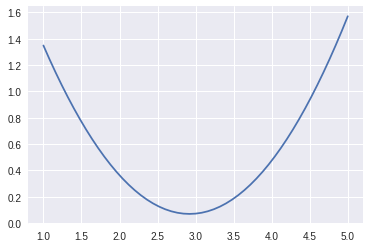

In [6]:
def exp_error(y, x, ws):
    def single_error(w):
        return mse(y, lineal(x, w, 0))
    _s = np.vectorize(single_error)
    return _s(ws)

ws = np.linspace(1, 5, 51)
plt.plot(ws, exp_error(y, x, ws))
plt.show()

## Solución
Dado que la función de error tiene un solo mínimo, se podrían tomar 2 valores cercanos de manera de conocer en qué dirección es conveniente explorar. La función lineal en realidad es una función que depende no solo de los datos $x$, sino que también del parámetro a aprender $w$, entonces la notaremos como $h(x,w)$. Para conocer la pendiente de la función de error dado el parámetro a conocer debemos hacer:

$$pendiente_w(w_{1}, w_{0})=\frac{MSE(y,h(x,w_{1}))-MSE(y,h(x,w_{0}))}{w_{1}-w_{0}}$$ 

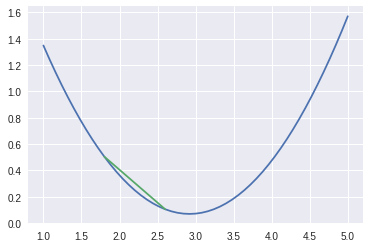

In [7]:
errors = exp_error(y, x, ws)
pendiente = (errors[10]-errors[20])/(ws[10]-ws[20])
correccion_ordenada_origen = -pendiente*ws[10] + errors[10]
plt.plot(ws, errors, ws[10:21], lineal(pendiente, ws[10:21], 0)+correccion_ordenada_origen)
plt.show()

Entonces, se podría inicializar $w$ de forma aleatoria e ir actualizando el valor en contra de la pendiende.

Errores a medida que se actualiza el valor de w


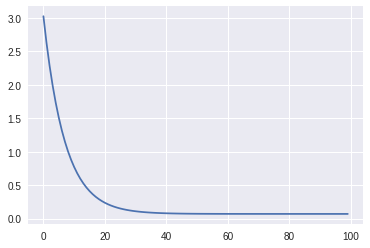

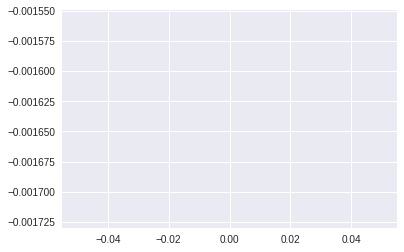

El w final es 2.9177536808311366


In [35]:
def pendiente(y_true, x, w, delta=1e-6):
    return (mse(y_true, lineal(x, w + delta, 0))-mse(y_true, lineal(x, w, 0))) / delta

w = 0 #Podría ser cualquier valor
ciclos = 100
lr = 0.1 
errors = []
for i in range(ciclos):
    p = pendiente(y, x, w)
    errors.append(mse(y, lineal(x, w, 0)))
    w = w - lr * p
print('Errores a medida que se actualiza el valor de w')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))

### Ejercicio
Este método se puede usar para aproximar todos los parámetros de la función lineal, es decir, tanto $w$ y $b$.

Con estas pendientes se actualizarán iterativamente los valores siguiendo el siguiente esquema:

```for i in range(ciclos):
    pw, pb = pendiente(w, b)
    w = w - lr * pw
    b = b - lr * pb
```

Donde `lr` (_learning rate_ o taza de aprendizaje) es un hiperparámetro (parámetro que no se aprende, sino que es definido por el desarrollador) que indica cuan agresivamente se aprende.

Errores a medida que se actualiza el valor de w


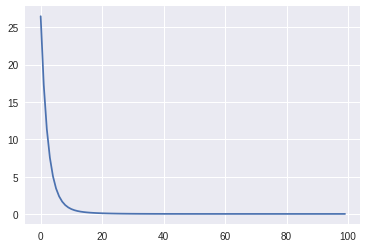

El w final es 2.9215193855894284
El b final es 0.013141134404810462


In [36]:
def pendiente(y_true, x, w, b, delta=1e-6):
    pw = (mse(y_true, lineal(x, w + delta, b))-mse(y_true, lineal(x, w, b))) / delta
    pb = (mse(y_true, lineal(x, w, b + delta))-mse(y_true, lineal(x, w, b))) / delta
    return pw, pb

w = 5 #Podría ser cualquier valor
b = 5
ciclos = 100
lr = 0.1 
errors = []
for i in range(ciclos):
    pw, pb = pendiente(y, x, w, b)
    errors.append(mse(y, lineal(x, w, b)))
    w = w - lr * pw
    b = b - lr * pb
    #Actualicé el valor de b
print('Errores a medida que se actualiza el valor de w')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))

## Gradient Descent
### Pendiente de $w$
Desde el punto de vista de la pendiente de $w$, si definimos a $w_{1}=w_{0}+\Delta$ entonces:

$$\lim_{\Delta \rightarrow 0} pendiente_w(w_{0}+\Delta,w_{0})= \lim_{\Delta \rightarrow 0} \frac{MSE(y,h(x,w_{0}+\Delta, b))-MSE(y,h(x,w_{0}, b))}{\Delta} =\frac{dMSE(y,h(x,w,b))}{dw}$$

Esta derivada se puede resolver por regla de la cadena:

$$\frac{dMSE(y,h(x,w,b))}{dw}=\frac{dMSE(Y,h(x,w,b))}{d(h(x,w,b))}.\frac{(h(x,w,b))}{dw}$$

La primer derivada se resuelve, devuelta por regla de la cadena:

$$\frac{dMSE(y,h(x,w,b))}{d(h(x,w,b)}=\frac{d(\frac{1}{N}\sum(y-h(x,w,b))^{2}}{d(h(x,w,b))}=-\frac{2}{N}\sum(y-h(x,w,b))$$

La segunda derivada se resuelve así:

$$\frac{dh(x,w,b)}{dw}=\frac{d(xw+b)}{dw}=x$$

Finalmente, resulta en:

$$\frac{dMSE(y,h(x,w,b))}{dw}=\frac{dMSE(Y,h(x,w,b))}{d(h(x,w,b))}.\frac{(h(x,w,b))}{dw}=\frac{-2\sum(y-(xw+b))*x}{N}$$

### Pendiente $b$
Desde el punto de vista de la pendiente de $b$, si definimos a $b_{1}=b_{0}+\Delta$ entonces:

$$\lim_{\Delta \rightarrow 0} pendiente_b(b_{0}+\Delta,b_{0})= \lim_{\Delta \rightarrow 0} \frac{MSE(y,h(x,w, b_{0}+\Delta))-MSE(y,h(x,w,b_{0}))}{\Delta} =\frac{dMSE(y,h(x,w,b))}{db}$$

Esta derivada se puede resolver por regla de la cadena:

$$\frac{dMSE(y,h(x,w,b))}{db}=\frac{dMSE(Y,h(x,w,b))}{d(h(x,w,b))}.\frac{(h(x,w,b))}{db}$$

La primer derivada ya se resolvió arriba.

La segunda derivada se resuelve así:

$$\frac{dh(x,w,b)}{db}=\frac{d(xw+b)}{db}=1$$

Finalmente, resulta en:

$$\frac{dMSE(y,h(x,w,b))}{dw}=\frac{dMSE(Y,h(x,w,b))}{d(h(x,w,b))}.\frac{(h(x,w,b))}{dw}=\frac{-2\sum(y-(xw+b))*1}{N}$$
### Ejercicio
Implemente la función gradiente considerando las derivadas de $\frac{dMSE(y,h(x,w,b))}{dw}$ y $\frac{dMSE(y,h(x,w,b))}{db}$, ejecute la función `gradient_check()` para verificar su implementación:



In [37]:
from random import uniform

def gradiente(y_true, x, w, b):
    #pw = (mse(y_true, lineal(x, w + delta, b))-mse(y_true, lineal(x, w, b))) / delta  
    gw = np.average((y_true-(x*w+b)) * x) * -2 #Implemente aqui el gradiente w
    gb = np.average(y_true-(x*w+b)) * -2  #Implemente aqui el gradiente b
    return gw, gb
               
def gradient_check(x, y_true, ciclos=1, delta=1e-6, error=1e-5):
    ok = True
    for i in range(ciclos):
        w = uniform(-50, 50) #genera un flotante aleatorio
        b = uniform(-50, 50) #genera un flotante aleatorio
        pw, pb = pendiente(y_true, x, w, b, delta)
        gw, gb = gradiente(y_true, x, w, b)
        if abs(pw - gw) > error or abs(pb - gb) > error:
            print('Error para w={}, b={}. pw={}, pb={}, gw={},gb={}'.format(w, b, pw, pb, gw, gb))
            print(pw-gw)
            print(pb-gb)
            ok = False
    if ok:
        print('No hubo errores en la prueba')
        
gradient_check(x, y)

No hubo errores en la prueba


### Ejercicio
Implemente el algoritmo para aprender parámetros que se utilizó anteriormente, pero en vez de utilizar las pendientes, utilize el gradiente. Grafique el error.

Valores iniciales. w=12.356620225757617 b=-18.9161338000608
Errores a medida que se actualiza el valor de w


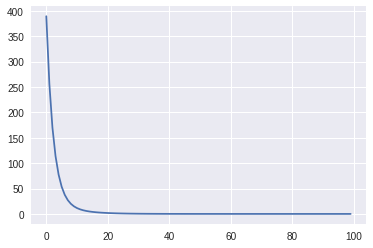

El w final es 2.9270604571828085
El b final es 0.013141629530112664


In [38]:
w = uniform(-50, 50) #genera un flotante aleatorio
b = uniform(-50, 50) #genera un flotante aleatorio
print('Valores iniciales. w={} b={}'.format(w, b))
ciclos = 100
lr = 0.1
#Incluya su código para entrenar la regresión lineal
errors = []
for i in range(ciclos):
    pw, pb = gradiente(y, x, w, b)
    errors.append(mse(y, lineal(x, w, b)))
    w = w - lr * pw
    b = b - lr * pb
    #Actualicé el valor de b
print('Errores a medida que se actualiza el valor de w')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))

## Generalizando para problemas con multiples variables
Cuando el problema en el que se quiere encontrar una relación entre multiples variables, es decir $\bar{X}=(x_0, x_1, ..., x_n)$, y un valor objetivo $y$, los valores a optimizar son $\bar{W}=(w_0, w_1, ..., w_n)$ y $b$.

$$\hat{y}=\bar{X}\cdot\bar{W}+b=x_0w_0+x_1w_1+...+x_iw_i+b$$

Si se considera que se puede tener muchas instancias, $\bar{X_0}, \bar{X_1},..., \bar{X_i}$, el problema de predecir todos los valores se puede expresar como un problema de matrices donde:

$$X= \left[\begin{array}{c}
\bar{X_{0}}^{T}\\
\bar{X_{1}}^{T}\\
\vdots\\
\bar{X_{n}}^{T}
\end{array}\right]$$

$$\hat{Y}=X\cdot\bar{W}+b$$

Es importante notar que:
$$\frac{dMSE(\bar{Y},h(X,\bar{W},b))}{dw_n}=\frac{dMSE(\bar{Y},h(X,\bar{W},b))}{d(h(X,\bar{W},b))}.\frac{(h(X,\bar{W},b))}{dw_n}$$
Donde la primera derivada se resuelve como
$$\frac{dMSE(\bar{Y},h(X,\bar{W},b))}{d(w_n))}=\frac{d(\frac{1}{N}\sum(\bar{Y}-h(X,\bar{W},b))^{2}}{d(h(X,\bar{W},b))}=-\frac{2}{N}\sum((\bar{Y}-h(X,\bar{W},b))\bar{x_n})$$

La porque segunda derivada se resuelve así:

$$\frac{dh(X,\bar{W},b)}{dw_n}=\frac{d(x_0w_0+x_1w_1+...+x_iw_i+b)}{dw_n}=\bar{x_n}$$

In [12]:
import numpy as np

def lineal(x, w, b):
    return np.dot(x, w) + b

def gradiente(y_true, x, w, b):
    dm = -2 * (y_true - lineal(x, w, b))
    gw = np.transpose(np.average(np.transpose(x) * dm, axis=1))
    gb = np.average(dm)
    return gw, gb

w = np.asarray([1,2,3])
x = np.asarray([[1,2,3], [2,3,4]])
b = 1
y = np.asarray([10, 20])
print(lineal(x, w, b))
print(gradiente(y, x, w, b))

[15 21]
(array([ 7., 13., 19.]), 6.0)


## Ejemplo
En el siguiente segmento se inicializa datos tomados de los dataset de ejemplo provistos por [Weka](https://www.cs.waikato.ac.nz/~ml/weka/datasets.html). En partícular, el dataset `Housing.arff`[1] que se encuentra en el archivo `datasets-numeric.jar`. El dataset contiene 506 puntos de datos con 14 atributos (13 se asumen independientes y uno dependiente). Los atributos son de acuerdo a lo documentado en el archivo `arff`:
1. __CRIM__      per capita crime rate by town.
2. __ZN__        proportion of residential land zoned for lots over 25,000 sq.ft.
3. __INDUS__     proportion of non-retail business acres per town.
4. __CHAS__      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. __NOX__       nitric oxides concentration (parts per 10 million).
6. __RM__        average number of rooms per dwelling.
7. __AGE__       proportion of owner-occupied units built prior to 1940.
8. __DIS__       weighted distances to five Boston employment centres.
9. __RAD__       index of accessibility to radial highways.
10. __TAX__      full-value property-tax rate per \$10,000.
11. __PTRATIO__  pupil-teacher ratio by town.
12. __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks.
13. __LSTAT__    % lower status of the population.
14. __MEDV__     Median value of owner-occupied homes in \$1000's. <- Valor a predecir.

[1] Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

### Explicación del código
Los datos ya se encuentran almacenados en una matrix de Numpy, que está en el archivo `02-housing.npy`. Esta matriz es de 506 por 14 elementos. La última columna tiene los valores de __MEDV__, es decir nuestro objetivos de la regresión. Debido a que se desconoce si los datos originales están almacenados con algún orden, se reordenan las instancias de forma aleatoria. De las 506 instancias 400 son tomadas para el conjunto de entrenamiento y 106 para el de evaluación. Finalmente, los atributos independientes son escalados a valores entre [0, 1] tomando como base los mínimos y máximos de los atributos de entrenamiento.

__Nota__: Probar que pasa si no se hace este escalado. Imprimir los gradientes, cambiar el `lr`.

In [13]:
import os.path
while not os.path.exists('02-housing.npy'):
    #Si no está el archivo hay que subirlo. Solo para Google Colab!!
    from google.colab import files
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
data = np.load('02-housing.npy')
data = data.astype(np.float32)
np.random.shuffle(data)
x_train = data[:400,:13]
y_train = data[:400,13].reshape((400,)) #Transforma de una matrix de (400, 1) a un vector de (400,)
x_test = data[400:,:13]
y_test = data[400:,13].reshape((106,)) #Transforma de una matrix de (400, 1) a un vector de (400,)
maxs = np.max(x_train, axis=0)
mins = np.min(x_train, axis=0)
x_train = (x_train - mins) / (maxs - mins)
x_test = (x_test - mins) / (maxs - mins)

TypeError: ignored

In [0]:
w = np.random.randn(13)
b = uniform(-10, 10)
print('Valores iniciales. w={} b={}'.format(w, b))
ciclos = 1000
lr = 0.1
errors = []
errors_test = []
for i in range(ciclos):
    pw, pb = gradiente(y_train, x_train, w, b)
    errors.append(mse(y_train, lineal(x_train, w, b)))
    errors_test.append(mse(y_test, lineal(x_test, w, b)))
    w = w - lr * pw
    b = b - lr * pb 
print('Errores a medida que se actualiza el valor de w y b')
plt.plot(range(ciclos), errors, 'b-', range(ciclos), errors_test, 'r-')
plt.yscale('log')
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))

In [0]:
y_pred = lineal(x_test, w, b)
print('El error para el conjunto de prueba es {}'.format(mse(y_test, y_pred)))
from scipy.stats import pearsonr
print('La correalción de Pearson entre los valores reales y los predichos es {}, con un pvalue: {}'.format(*pearsonr(y_test, y_pred)))
plt.plot(y_test, y_pred, 'r*')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

# Tensorflow
[Tensorflow](https://www.tensorflow.org/) en una librería de para aplicaciones de operaciones númericas de alta performace creada por Google con foco en inteligencia artificial y Deep Learning. Tensorflow soporta procesamiento en CPU, GPU y TPUs. Tensorflow provee ya implementada algunas operaciones comunes como calcular los gradientes de las variables o técnicas de entrenamiento comunes como _Gradient Descent_.
A continuación, se muestra un ejemplo de como utilizar Tensorflow para realizar una regresión lineal.

In [55]:
import tensorflow as tf
rng = np.random

# Placeholder de las entradas
X = tf.placeholder(tf.float32, [None, 13])
Y = tf.placeholder(tf.float32, [None])

W = tf.Variable(rng.randn(13).astype(np.float32), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Modelo lineal
lineal = tf.add(tf.reduce_sum(tf.matmul(X, tf.expand_dims(W, axis=1)), axis=1), b)

# MSE
cost = tf.reduce_mean(tf.pow(lineal-Y, 2))
# Gradient descent
# minimize() sabe que hay que modificar W y b porque están configuradas como trainable=True por defecto
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Comenzar una sessión
with tf.Session() as sess:

    # Inicializar
    sess.run(init)
    y_pred = sess.run(lineal, feed_dict={X: x_test, Y:y_test})
    print('El error para el conjunto de prueba es {}'.format(mse(y_test, y_pred)))
    plt.plot(y_test, y_pred, 'r*')
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.show()
    errors = []
    errors_test = []
    print('Entrenando')
    for epoch in range(ciclos):
        sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
        errors.append(sess.run(cost, feed_dict={X: x_train, Y:y_train}))
        errors_test.append(sess.run(cost, feed_dict={X: x_test, Y:y_test}))
    print('Error en entrenamiento')
    plt.plot(range(ciclos), errors, 'b-', range(ciclos), errors_test, 'r-')
    plt.show()
    y_pred = sess.run(lineal, feed_dict={X: x_test, Y:y_test})
    print('El error para el conjunto de prueba es {}'.format(mse(y_test, y_pred)))
    print('La correalción de Pearson entre los valores reales y los predichos es {}, con un pvalue: {}'.format(*pearsonr(y_test, y_pred)))
    plt.plot(y_test, y_pred, 'r*')
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.show()
    print('El w final es {}'.format(sess.run(W)))
    print('El b final es {}'.format(sess.run(b)))

NameError: ignored